<a href="https://colab.research.google.com/github/Gopikad76/Gopikad76/blob/main/FDS_project_Geospatial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import folium


In [ ]:
#loading my dataset
print('                DATA PREPROCESSING                   ')
print("--------------------------------------------------------------")
data=pd.read_csv("/content/UPS_Facilities.csv")

#Displaying the initial information about the dataset

print("Initial Dataset Information :")
print("-------------------------------------")
print(data.info())
print("                                            ")

print("MISSING OR INCORRECT VALUES:")
print("--------------------------------------")
print(data.isnull().sum())

#return the dataframe with no empty cells

print("Checking the dataset contain any null or incorrect values:")
print("------------------------------------------------------------")
data= data.astype(str)
df = data.dropna(inplace = True)
print(df)

                DATA PREPROCESSING                   
--------------------------------------------------------------
Initial Dataset Information :
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49317 entries, 0 to 49316
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       49317 non-null  int64  
 1   X           49317 non-null  float64
 2   Y           49317 non-null  float64
 3   FID         49317 non-null  int64  
 4   FEATURE_ID  49317 non-null  int64  
 5   NAME        49317 non-null  object 
 6   ADDRESS     49317 non-null  object 
 7   ADDRESS2    49317 non-null  object 
 8   ADDRESS3    49317 non-null  object 
 9   CITY        49317 non-null  object 
 10  STATE       49317 non-null  object 
 11  ZIP         49317 non-null  int64  
 12  PHONE       49317 non-null  object 
 13  LATITUDE    49317 non-null  float64
 14  LONGITUDE   49317 non-null  float64
 15  MATC

<ipython-input-75-61064f13ca79>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


   STATE  Facility Count
0     AK              41
1     AL             713
2     AR             412
3     AZ             789
4     CA            5016
5     CO             981
6     CT             655
7     DC             187
8     DE             126
9     FL            3910
10    GA            1854
11    HI              96
12    IA             577
13    ID             228
14    IL            2416
15    IN            1212
16    KS             497
17    KY             682
18    LA             508
19    MA            1304
20    MD             927
21    ME             195
22    MI            1835
23    MN             788
24    MO             986
25    MS             332
26    MT             222
27    NC            1777
28    ND             121
29    NE             321
30    NH             284
31    NJ            2407
32    NM             246
33    NV             367
34    NY            2603
35    OH            2093
36    OK             608
37    OR             546
38    PA            2011


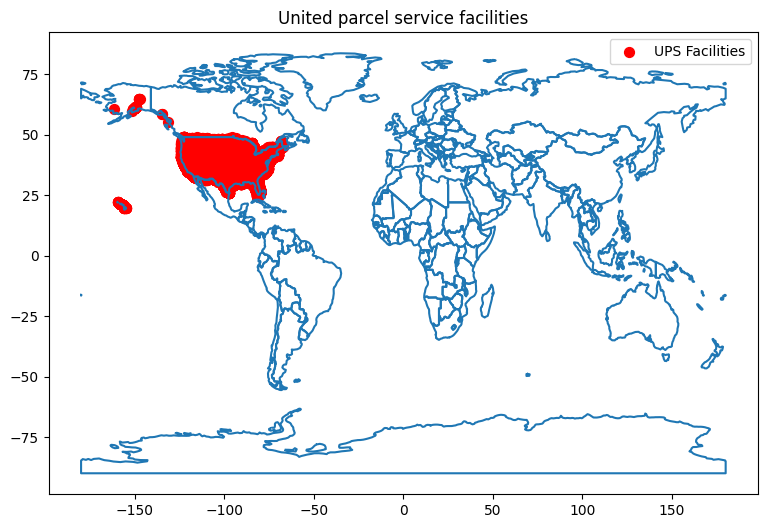

In [ ]:


df = pd.DataFrame(data)

# Create a GeoDataFrame by converting DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')


# Plotting the UPS facilities on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# counting the UPS facilities per state
facilities_per_state = gdf.groupby('STATE').size().reset_index(name='Facility Count')
print(facilities_per_state)

fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=50, label='UPS Facilities')
plt.title('United parcel service facilities')
plt.legend()
plt.show()

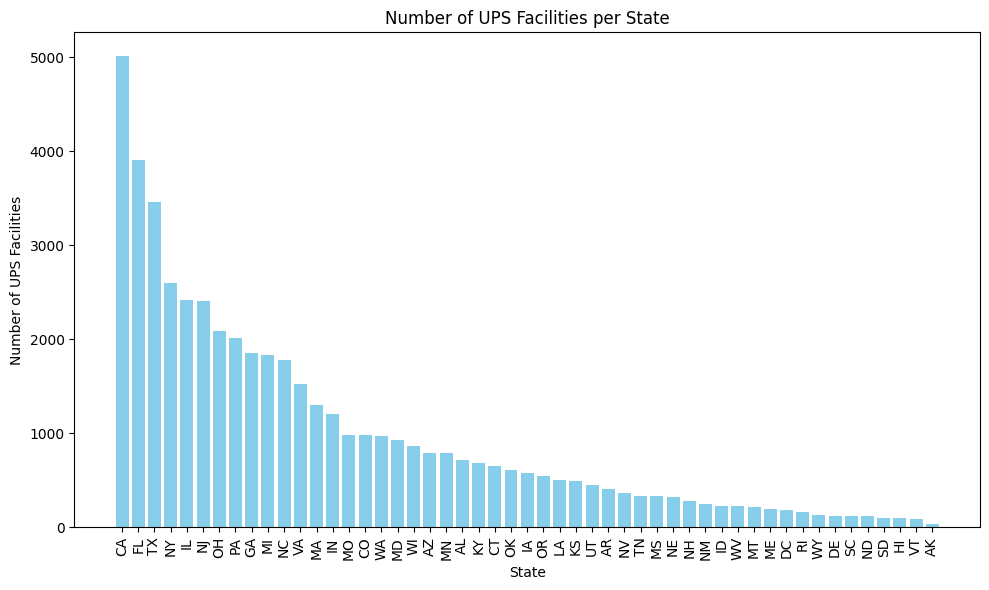

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count UPS facilities per state
facilities_per_state = data['STATE'].value_counts().reset_index()
facilities_per_state.columns = ['STATE', 'Facility Count']
facilities_per_state = facilities_per_state.sort_values(by='Facility Count', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(facilities_per_state['STATE'], facilities_per_state['Facility Count'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of UPS Facilities')
plt.title('Number of UPS Facilities per State')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the bar graph
plt.show()


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-73-8ab95be8bfdc>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


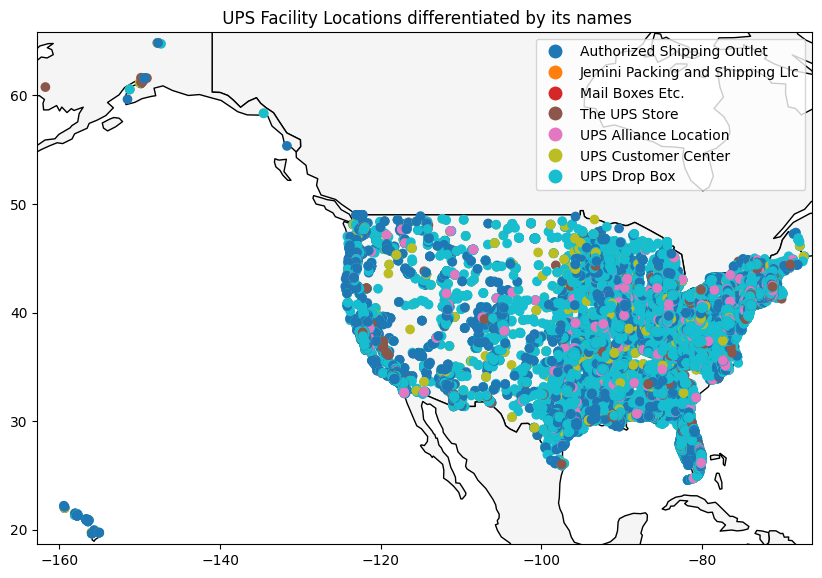

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Create a GeoDataFrame from the UPS facility data
geometry = gpd.points_from_xy(data['LONGITUDE'], data['LATITUDE'])
crs = {'init': 'epsg:4326'}  # WGS84 coordinate reference system
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs=crs)

# Create a base map (optional)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 10), color='whitesmoke', edgecolor='black')

# Plot UPS facility locations with different colors based on 'NAME' attribute
gdf.plot(ax=ax, column='NAME', categorical=True, legend=True, legend_kwds={'loc': 'upper right'})

# Get the bounds of the GeoDataFrame
minx, miny, maxx, maxy = gdf.total_bounds

# Calculate a buffer around the bounds
buffer = 1  # Adjust the buffer size as needed
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)

plt.title(' UPS Facility Locations differentiated by its names')
plt.show()


In [ ]:
import pandas as pd
import folium
from sklearn.neighbors import NearestNeighbors

# Sample delivery locations (replace with your own dataset or read from a file)
data = pd.read_csv("/content/UPS_Facilities.csv")

# Convert the data to a DataFrame and select a subset (e.g., first 20 rows)
df = pd.DataFrame(data)
df=df.head(50)


# Create a map centered around the first delivery location
m = folium.Map(location=[df['LATITUDE'].iloc[0], df['LONGITUDE'].iloc[0]], zoom_start=10)

# Plot delivery locations on the map
for index, row in df.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=f"Delivery {index+1}").add_to(m)

# Use Nearest Neighbors to find the optimized route
coordinates = df[['LATITUDE', 'LONGITUDE']].values
nn = NearestNeighbors(n_neighbors=len(coordinates), algorithm='auto').fit(coordinates)
distances, indices = nn.kneighbors(coordinates)

# Plot the optimized delivery route on the map
route = indices[0]
route = list(route) + [route[0]]  # Connect the route back to the starting point to form a loop
route_points = [[df['LATITUDE'].iloc[i], df['LONGITUDE'].iloc[i]] for i in route]
folium.PolyLine(locations=route_points, color='red', weight=2.5, opacity=1).add_to(m)

# Display the map
m.save("delivery_map.html")  # Save the map as an HTML file
m

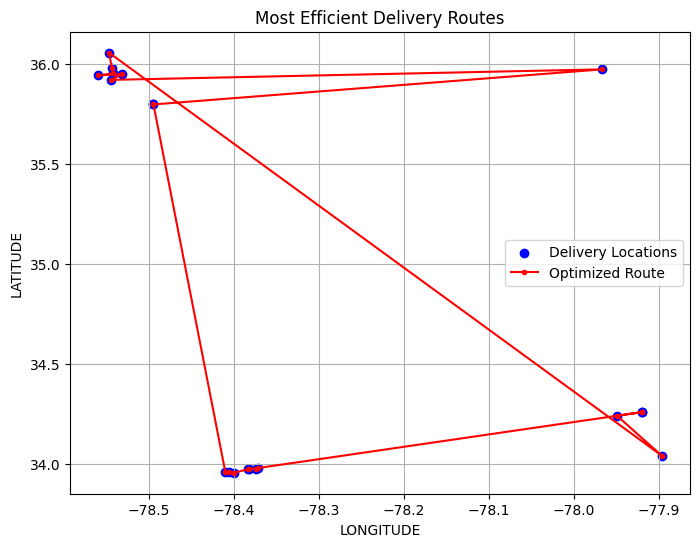

In [ ]:

# Convert the data to a DataFrame
df = pd.DataFrame(data)
df=df.head(20)

# Plot the delivery locations on a map
plt.figure(figsize=(8, 6))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], color='blue', label='Delivery Locations')

# Use Nearest Neighbors to find the optimized route
coordinates = df[['LATITUDE', 'LONGITUDE']].values
nn = NearestNeighbors(n_neighbors=len(coordinates), algorithm='auto').fit(coordinates)
distances, indices = nn.kneighbors(coordinates)

# Plot the optimized delivery route
route = indices[0]
route = list(route) + [route[0]]  # Connect the route back to the starting point to form a loop

plt.plot(df['LONGITUDE'].iloc[route], df['LATITUDE'].iloc[route], color='red', linestyle='-', marker = 'o',
         markersize=3, label='Optimized Route')

plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.title('Most Efficient Delivery Routes')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


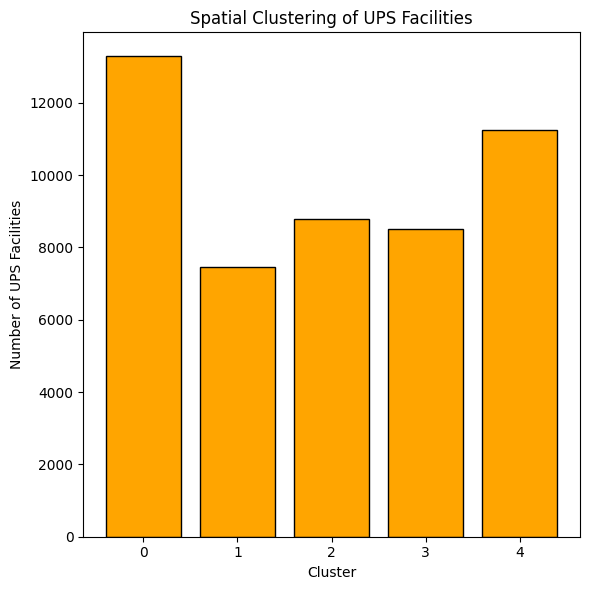

In [ ]:

from sklearn.cluster import KMeans

# readed dataset
coordinates = data[['LATITUDE', 'LONGITUDE']]

# Perform K-means clustering to group UPS facilities
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
data['cluster'] = kmeans.fit_predict(coordinates)

# Count UPS facilities in each cluster
cluster_counts = data['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Facility Count']

# Plotting the bar graph
plt.figure(figsize=(6, 6))
plt.bar(cluster_counts['Cluster'], cluster_counts['Facility Count'], color='orange',edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Number of UPS Facilities')
plt.title('Spatial Clustering of UPS Facilities')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the bar graph
plt.show()


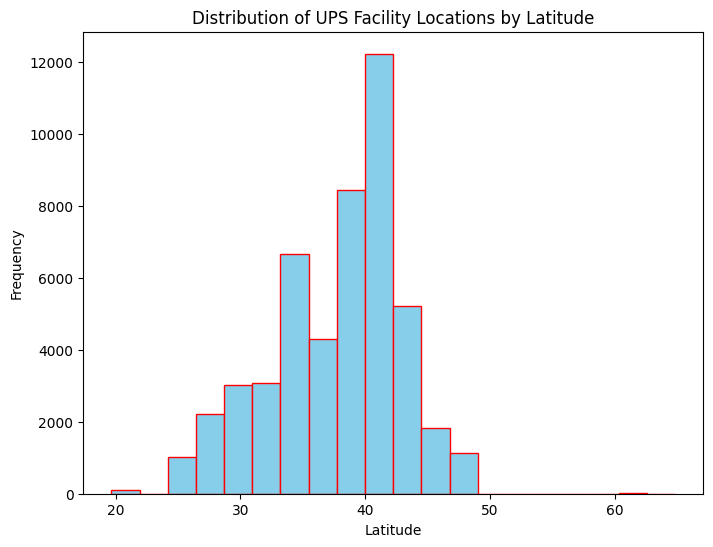

In [ ]:

# Create a histogram based on latitude coordinates
plt.figure(figsize=(8, 6))
plt.hist(data['LATITUDE'], bins=20, color='skyblue', edgecolor='red')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of UPS Facility Locations by Latitude')

# Show the histogram
plt.show()


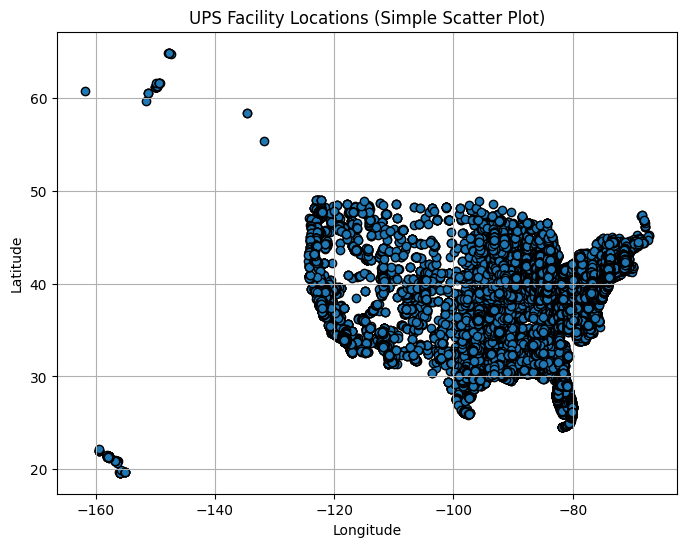

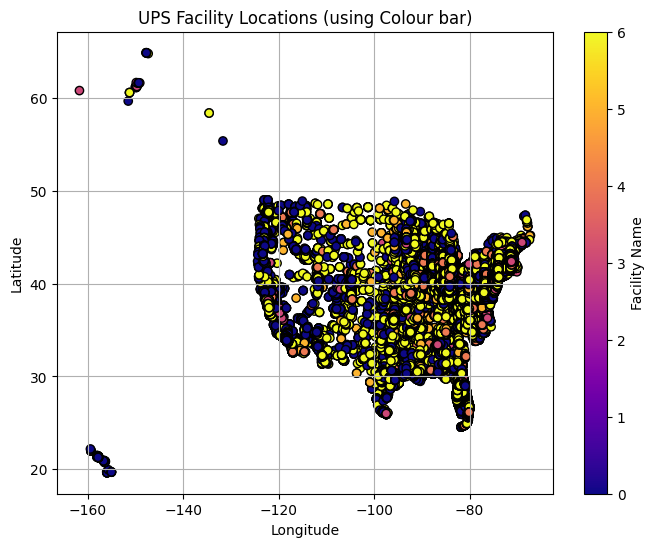

In [ ]:

# Create a DataFrame from the given dataset
df = pd.DataFrame(data)


# Scatter plot of UPS facility locations
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['LONGITUDE'], df['LATITUDE'], edgecolor='black')  # Simple scatter plot without categorical colors
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('UPS Facility Locations (Simple Scatter Plot)')
plt.grid(True)
plt.show()

# Scatter plot of UPS facility locations with different colors based on 'NAME' attribute
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['NAME'].astype('category').cat.codes, cmap='plasma', edgecolor='black')
plt.colorbar(scatter, label='Facility Name')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('UPS Facility Locations (using Colour bar)')
plt.grid(True)
plt.show()
